# Comparison with Stokes expansions

Stokes coefficients derived from [https://www.lautrup.nbi.dk//continuousmatter2/addenda/stokeswaves.pdf](https://www.lautrup.nbi.dk//continuousmatter2/addenda/stokeswaves.pdf)

json file for inverse plane $(\phi,\psi)$ plane generated by coefficients.ipynb notebook in stokes directory using sympy

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from waterwaves import unpack,IEj,wave

In [2]:
N,H,d=20,0.12*2*np.pi,0
sol=wave(N,H)
Ej,Bj,Ub,Q,R=unpack(sol.x)

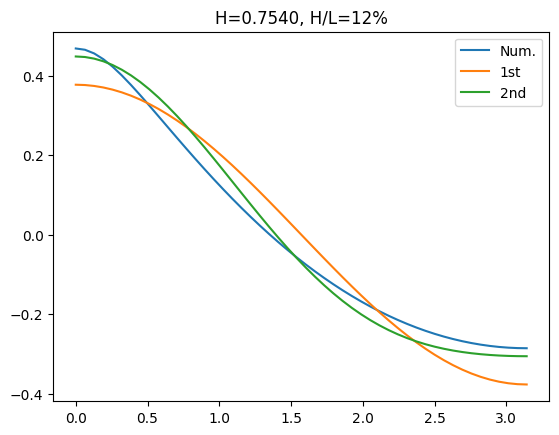

In [3]:
X=np.linspace(0,np.pi)
Y=IEj([d,*Ej],X)
plt.plot(X,Y,label="Num.")
plt.plot(X,H*np.cos(X)/2,label="1st") # first order Stokes approximation (linear)
plt.plot(X,H*np.cos(X)/2+H**2*np.cos(2*X)/8,label="2nd") # second order Stokes approximation direct space (x,y)
plt.legend()
plt.title(f'H={H:6.4f}, H/L={H/2/np.pi:.0%}')
plt.show()

In [4]:
import json

with open('stokes/stokes.json','rt') as stokes:
    coeff=json.load(stokes)
AC,FC,KC={},{},{}

for term in coeff['A']:
    AC[eval(term)]=eval(coeff['A'][term])
for term in coeff['F']:
    FC[eval(term)]=eval(coeff['F'][term])
for term in coeff['K']:
    KC[eval(term)]=eval(coeff['K'][term])
    
def AE(b,N):
    varray=np.zeros(N)
    varray[0]=b
    for term in AC:
        if term[0]<=N:
            if term[1]<=N:
                varray[term[0]-1]+=AC[term]*b**term[1]
    return varray

def CE(C,b,N):
    value=1 if C==FC else 0
    for term in C:
        if term<=N:
            value+=C[term]*b**term
    return value

def xp(phi,b,N):
    A=AE(b,N)
    return -phi-sum([A[j]*np.sin((j+1)*phi)for j in range(N)])

def yp(phi,b,N):
    A=AE(b,N)
    return sum([A[j]*np.cos((j+1)*phi)for j in range(N)])

In [5]:
phi=np.linspace(0,-np.pi) # inverse plane (phi,psi)

Text(0.5, 1.0, 'H=0.7540, H/$\\lambda$=12%')

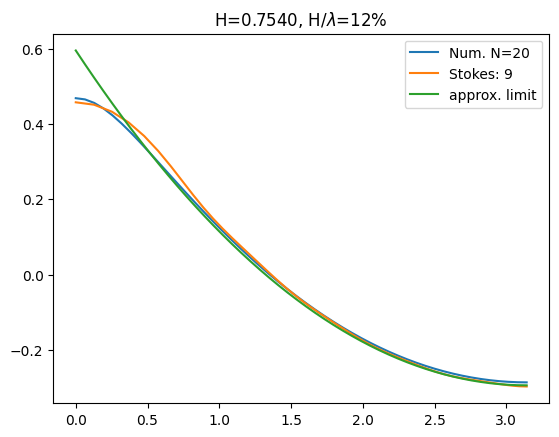

In [6]:
NS=9
from scipy.optimize import newton
b=newton(lambda b:yp(0,b,NS)-yp(-np.pi,b,NS)-H,H/2)
xNS=xp(phi,b,NS)
yNS=yp(phi,b,NS)-CE(KC,b,NS)/2
plt.plot(X,Y,label=f"Num. N={N}")
plt.plot(xNS,yNS,label=f"Stokes: {NS}") # Stokes expansion
A=2*np.pi/(3**(1/2)*np.sinh(1/2))
YM=A*(np.cosh((X-np.pi)/2/np.pi)-2*np.sinh(1/2))
plt.plot(X,YM,label="approx. limit") # from wikipedia page
plt.legend()
plt.title(f'H={H:6.4f}, H/$\\lambda$={H/2/np.pi:.0%}')